In [1]:
import pandas as pd
import matplotlib.pyplot as plt

order_items_df = pd.read_csv('../data/order_items.csv')
order_reviews_df = pd.read_csv('../data/order_reviews.csv')

duplicates_count = order_reviews_df.duplicated(subset=['order_id']).sum()

cleaned_order_items_df = order_items_df.drop_duplicates(subset=['order_id', 'seller_id'], keep='first')

merged_df = pd.merge(cleaned_order_items_df, order_reviews_df, on='order_id', how='left')

final_df = merged_df[['order_id', 'seller_id', 'review_score']]

In [2]:
df = pd.DataFrame(columns=['seller_id', 'number_of_negative_reviews', 'number_of_positive_reviews'])

unique_seller_ids = final_df['seller_id'].unique()

seller_ids = []
negative_reviews_counts = []
positive_reviews_counts = []


for seller_id in unique_seller_ids:
    
    filtered_df = final_df[final_df['seller_id'] == seller_id]
    
    negative_reviews_count = len(filtered_df[filtered_df['review_score'].isin([1, 2])])
    positive_reviews_count = len(filtered_df[filtered_df['review_score'].isin([3, 4, 5])])
    
    seller_ids.append(seller_id)
    negative_reviews_counts.append(negative_reviews_count)
    positive_reviews_counts.append(positive_reviews_count)

df['seller_id'] = seller_ids
df['number_of_negative_reviews'] = negative_reviews_counts
df['number_of_positive_reviews'] = positive_reviews_counts

df.head()

,seller_id,number_of_negative_reviews,number_of_positive_reviews
0,48436dade18ac8b2bce089ec2a041202,21,117
1,dd7ddc04e1b6c2c614352b383efe2d36,24,98
2,5b51032eddd242adc84c38acab88f23d,1,11
3,9d7a1d34a5052409006425275ba1c2b4,1,12
4,df560393f3a51e74553ab94004ba5c87,4,24


In [3]:
df['rating'] = df['number_of_positive_reviews'] - df['number_of_negative_reviews']
df_sorted = df.sort_values(by='number_of_positive_reviews', ascending=False).reset_index(drop=True)
df_sorted.head(10)

,seller_id,number_of_negative_reviews,number_of_positive_reviews,rating
0,6560211a19b47992c3666cc44a7e94c0,329,1531,1202
1,cc419e0650a3c5ba77189a1882b7556a,263,1485,1222
2,4a3ca9315b744ce9f8e9374361493884,360,1462,1102
3,1f50f920176fa81dab994f9023523100,203,1206,1003
4,da8622b14eb17ae2831f4ac5b9dab84a,160,1171,1011
5,955fee9216a65b617aa5c0531780ce60,152,1137,985
6,7a67c85e85bb2ce8582c35f2203ad736,130,1034,904
7,4869f7a5dfa277a7dca6462dcf3b52b2,155,977,822
8,ea8482cd71df3c1969d7b9473ff13abc,181,966,785
9,3d871de0142ce09b7081e2b9d1733cb1,129,952,823


In [4]:
df_sorted = df.sort_values(by='rating', ascending=True).reset_index(drop=True)

file_path = 'new_data_task3/rating_of_sellers.csv'
df_sorted.to_csv(file_path, index=False)

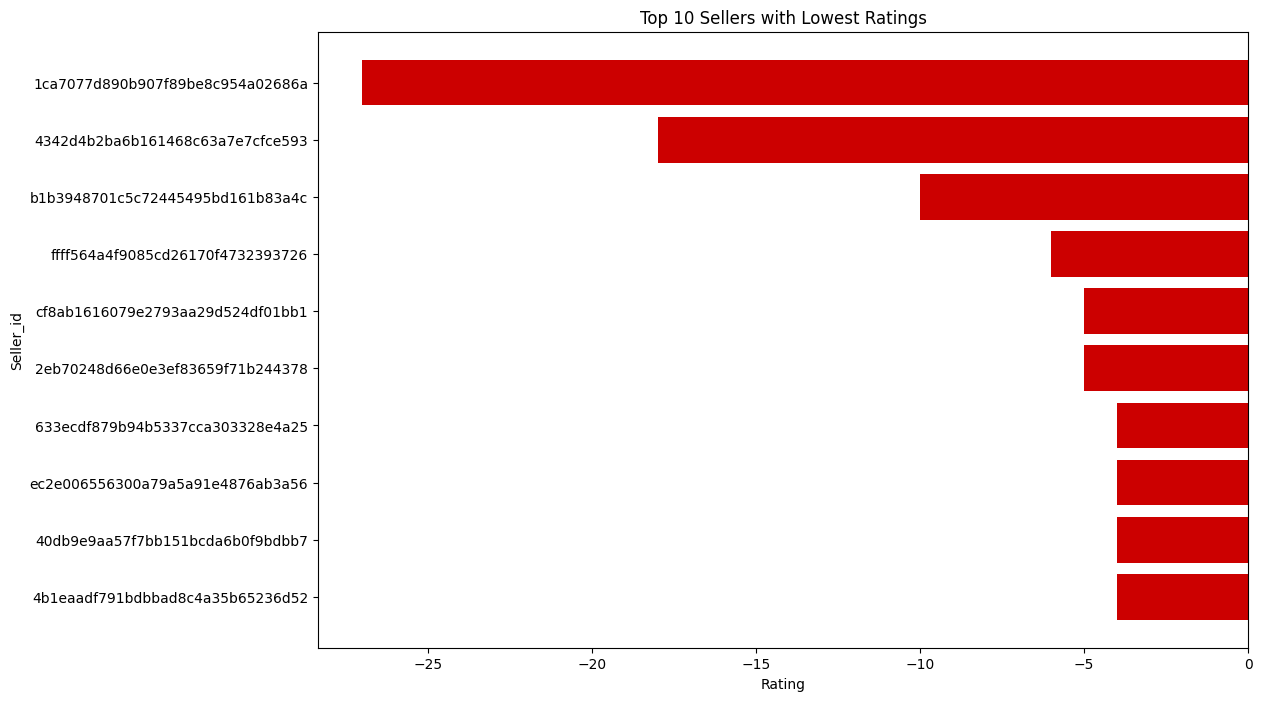

In [5]:
top_sellers = df_sorted.nsmallest(10, 'rating')

plt.figure(figsize=(12, 8))

plt.barh(top_sellers['seller_id'], top_sellers['rating'], color='#CC0000')
plt.xlabel('Rating')
plt.ylabel('Seller_id')
plt.title('Top 10 Sellers with Lowest Ratings')

plt.yticks(fontsize=10)  
plt.gca().invert_yaxis()

plt.savefig('new_data_task3/Top_10_Sellers_with_Lowest_Ratings.png', bbox_inches='tight')
plt.show()

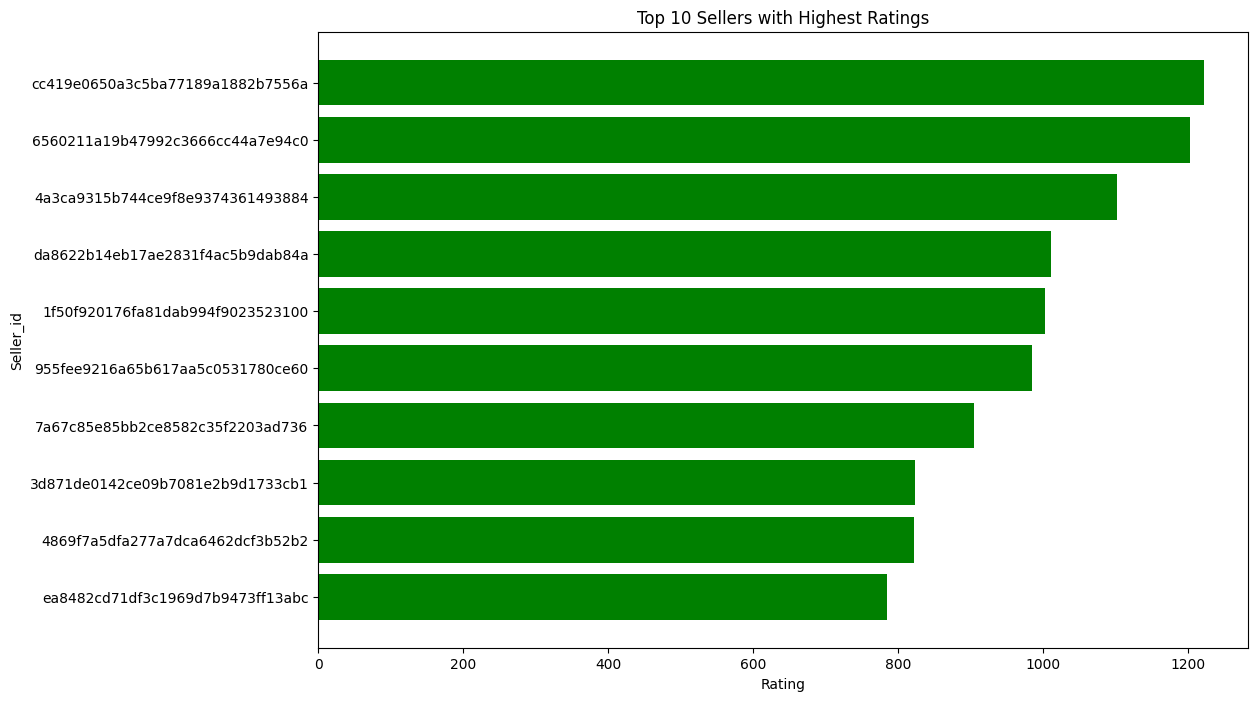

In [6]:
top_10_sellers = df_sorted.nlargest(10, 'rating')

plt.figure(figsize=(12, 8))

plt.barh(top_10_sellers['seller_id'], top_10_sellers['rating'], color='green')
plt.xlabel('Rating')
plt.ylabel('Seller_id')
plt.title('Top 10 Sellers with Highest Ratings')

plt.yticks(fontsize=10)  
plt.gca().invert_yaxis()

plt.savefig('new_data_task3/Top_10_Sellers_with_Highest_Ratings.png', bbox_inches='tight')
plt.show()